In [1]:

import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.mode.chained_assignment = None
%matplotlib inline



In [2]:
df = pd.read_csv('./info.csv')
df

,Unnamed: 0,date,hour,swell_rating,primary_swell_height,primary_swell_period
0,0,2020-01-01 02:00,12am,1,1m,8s
1,1,2020-01-01 05:00,3am,0,1m,7s
2,2,2020-01-01 08:00,6am,1,0.9m,7s
3,3,2020-01-01 11:00,9am,1,0.8m,7s
4,4,2020-01-01 14:00,12pm,0,0.8m,7s
...,...,...,...,...,...,...
17538,17538,2021-12-31 09:00,9am,1,1.1m,7s
17539,17539,2021-12-31 12:00,12pm,1,1m,8s
17540,17540,2021-12-31 15:00,3pm,1,0.9m,8s
17541,17541,2021-12-31 18:00,6pm,1,0.9m,8s


In [3]:
del df["Unnamed: 0"]
df

,date,hour,swell_rating,primary_swell_height,primary_swell_period
0,2020-01-01 02:00,12am,1,1m,8s
1,2020-01-01 05:00,3am,0,1m,7s
2,2020-01-01 08:00,6am,1,0.9m,7s
3,2020-01-01 11:00,9am,1,0.8m,7s
4,2020-01-01 14:00,12pm,0,0.8m,7s
...,...,...,...,...,...
17538,2021-12-31 09:00,9am,1,1.1m,7s
17539,2021-12-31 12:00,12pm,1,1m,8s
17540,2021-12-31 15:00,3pm,1,0.9m,8s
17541,2021-12-31 18:00,6pm,1,0.9m,8s


In [4]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M')
df

,date,hour,swell_rating,primary_swell_height,primary_swell_period
0,2020-01-01 02:00:00,12am,1,1m,8s
1,2020-01-01 05:00:00,3am,0,1m,7s
2,2020-01-01 08:00:00,6am,1,0.9m,7s
3,2020-01-01 11:00:00,9am,1,0.8m,7s
4,2020-01-01 14:00:00,12pm,0,0.8m,7s
...,...,...,...,...,...
17538,2021-12-31 09:00:00,9am,1,1.1m,7s
17539,2021-12-31 12:00:00,12pm,1,1m,8s
17540,2021-12-31 15:00:00,3pm,1,0.9m,8s
17541,2021-12-31 18:00:00,6pm,1,0.9m,8s


In [5]:
df['year'],df['month'],df['day'] = df.date.dt.year, df.date.dt.month, df.date.dt.day
del df["date"]



In [6]:
replace_12am = {'12am':'00:00'}
replace_3am = {'3am':'03:00'}
replace_6am = {'6am':'06:00'}
replace_9am = {'9am':'09:00'}
replace_12pm = {'12pm':'12:00'}
replace_3pm = {'3pm':'15:00'}
replace_6pm = {'6pm':'18:00'}
replace_9pm = {'9pm':'21:00'}
df=df.replace(replace_12am)
df=df.replace(replace_3am)
df=df.replace(replace_6am)
df=df.replace(replace_9am)
df=df.replace(replace_12pm)
df=df.replace(replace_3pm)
df=df.replace(replace_6pm)
df=df.replace(replace_9pm)
df

,hour,swell_rating,primary_swell_height,primary_swell_period,year,month,day
0,00:00,1,1m,8s,2020,1,1
1,03:00,0,1m,7s,2020,1,1
2,06:00,1,0.9m,7s,2020,1,1
3,09:00,1,0.8m,7s,2020,1,1
4,12:00,0,0.8m,7s,2020,1,1
...,...,...,...,...,...,...,...
17538,09:00,1,1.1m,7s,2021,12,31
17539,12:00,1,1m,8s,2021,12,31
17540,15:00,1,0.9m,8s,2021,12,31
17541,18:00,1,0.9m,8s,2021,12,31


In [7]:
df["primary_swell_height"] = df['primary_swell_height'].str.rstrip("m")
df["primary_swell_period"] = df['primary_swell_period'].str.rstrip("s")
df

,hour,swell_rating,primary_swell_height,primary_swell_period,year,month,day
0,00:00,1,1,8,2020,1,1
1,03:00,0,1,7,2020,1,1
2,06:00,1,0.9,7,2020,1,1
3,09:00,1,0.8,7,2020,1,1
4,12:00,0,0.8,7,2020,1,1
...,...,...,...,...,...,...,...
17538,09:00,1,1.1,7,2021,12,31
17539,12:00,1,1,8,2021,12,31
17540,15:00,1,0.9,8,2021,12,31
17541,18:00,1,0.9,8,2021,12,31


In [8]:
df = df.drop_duplicates()
df = df.dropna()
df

,hour,swell_rating,primary_swell_height,primary_swell_period,year,month,day
0,00:00,1,1,8,2020,1,1
1,03:00,0,1,7,2020,1,1
2,06:00,1,0.9,7,2020,1,1
3,09:00,1,0.8,7,2020,1,1
4,12:00,0,0.8,7,2020,1,1
...,...,...,...,...,...,...,...
17532,15:00,1,0.7,8,2021,12,30
17534,21:00,0,0.9,7,2021,12,30
17538,09:00,1,1.1,7,2021,12,31
17540,15:00,1,0.9,8,2021,12,31


In [9]:
for col in df.columns:
    if col == 'primary_swell_height':
        df[col] = df[col].astype(float)
    if col == 'primary_swell_period':
        df[col] = df[col].astype(int)
    if col == 'swell_rating':
        df[col] = df[col].astype(int)
        

In [10]:
df.describe(include='all')

,hour,swell_rating,primary_swell_height,primary_swell_period,year,month,day
count,9587,9587.000000,9587.000000,9587.000000,9587.000000,9587.000000,9587.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN
top,21:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1259,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.232815,0.812580,6.535621,2020.449359,6.236362,15.668405
std,NaN,0.480189,0.608194,1.581389,0.497455,3.534433,8.717552
min,NaN,0.000000,0.100000,2.000000,2020.000000,1.000000,1.000000
25%,NaN,0.000000,0.400000,6.000000,2020.000000,3.000000,8.000000
50%,NaN,0.000000,0.700000,7.000000,2020.000000,6.000000,16.000000
75%,NaN,0.000000,1.000000,7.000000,2021.000000,9.000000,23.000000


In [11]:
def outliers(df,col_name):
    sns.boxplot(x = df[col_name])
    Q1 = np.percentile(df[col_name], 25)
    Q3 = np.percentile(df[col_name], 75)
    IQR = Q3-Q1
    if col_name == 'primary_swell_period':
        IQR_range = 7
        df[col_name][(df[col_name] < Q1 - 1.5*IQR ) | (df[col_name] > Q3 + IQR_range*IQR)] = np.nan
        
    if col_name == 'primary_swell_height':
        IQR_range = 4
        df[col_name][(df[col_name] < Q1 - 1.5*IQR ) | (df[col_name] > Q3 + IQR_range*IQR)] = np.nan
        
    df = df[df[col_name].notna()]
    
    return df



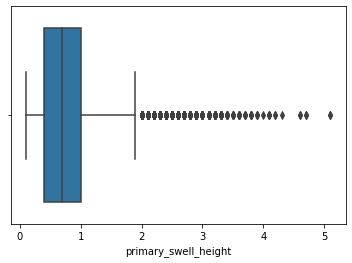

In [12]:
df = outliers(df, 'primary_swell_height')


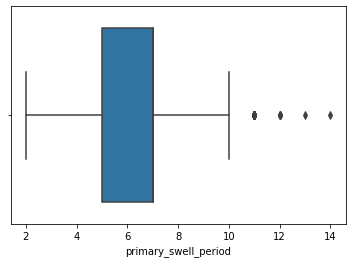

In [13]:
df = outliers(df, 'primary_swell_period')


In [14]:
df

,hour,swell_rating,primary_swell_height,primary_swell_period,year,month,day
0,00:00,1,1.0,8,2020,1,1
1,03:00,0,1.0,7,2020,1,1
2,06:00,1,0.9,7,2020,1,1
3,09:00,1,0.8,7,2020,1,1
4,12:00,0,0.8,7,2020,1,1
...,...,...,...,...,...,...,...
17532,15:00,1,0.7,8,2021,12,30
17534,21:00,0,0.9,7,2021,12,30
17538,09:00,1,1.1,7,2021,12,31
17540,15:00,1,0.9,8,2021,12,31


In [15]:
df.to_csv('clean_info.csv')